# Titanic Dataset Logistic Regression

### Importing Libraries

In [1]:
# Data prep.
import pandas as pd
import numpy as np

# Data viz.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Data Exploration

In [2]:
# getting the dataset
train = pd.read_csv('https://raw.githubusercontent.com/juinc/python_data_science_and_machine_learning_bootcamp/master/Machine%20Learning%20Sections/Logistic-Regression/titanic_train.csv')
kaggle_submission = pd.read_csv('https://raw.githubusercontent.com/juinc/python_data_science_and_machine_learning_bootcamp/master/Machine%20Learning%20Sections/Logistic-Regression/titanic_test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
kaggle_submission

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
# Dataset info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### VARIABLE DESCRIPTIONS:
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- survival - Survival (0 = No; 1 = Yes)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare (British pound)
- cabin - Cabin
- embarked - (C = Cherbourg; Q = Queenstown; S = - Southampton)

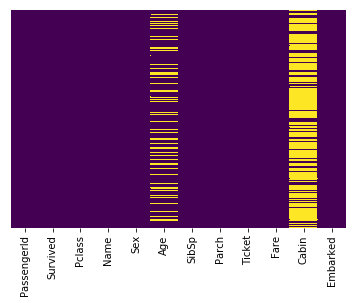

In [6]:
# Visualize null values proportion
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
# removing cabin column
train.drop('Cabin', axis=1, inplace=True)

- Every yellow line shows a null value in the column
- We can see that Age and Cabin are variables that has null values
- Age variable can be completed with some logic
- Cabin category has so much null values, so could probably not be usefull
- The other variables seens to be very well complete

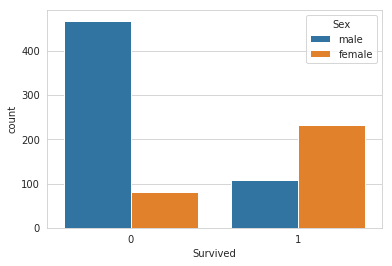

In [8]:
# Class proportion by Sex
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train)

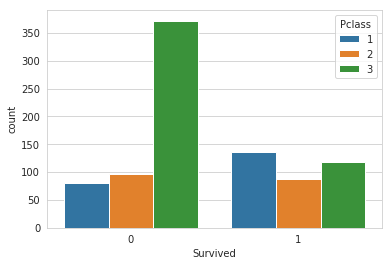

In [9]:
# Class proportion by Pclass
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)
# 1 = first class, 3 = cheapest class

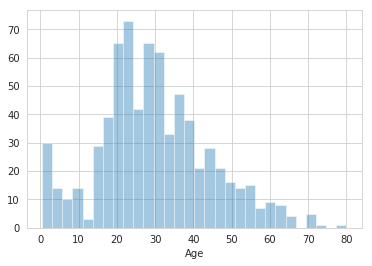

In [10]:
# Age distribution
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

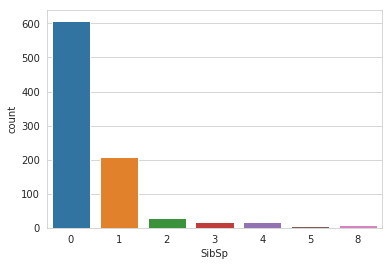

In [11]:
# SibSp distribution
sns.countplot(x='SibSp', data=train)

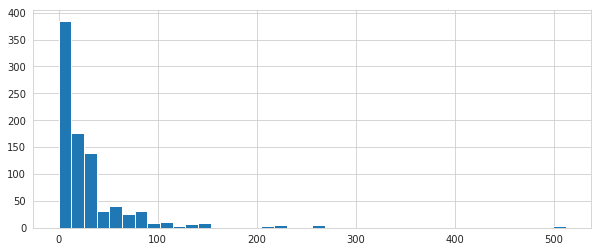

In [12]:
# Fare distribution
train['Fare'].hist(bins=40, figsize=(10, 4))

## Data Preparation

### 1) Fill the empty age values 

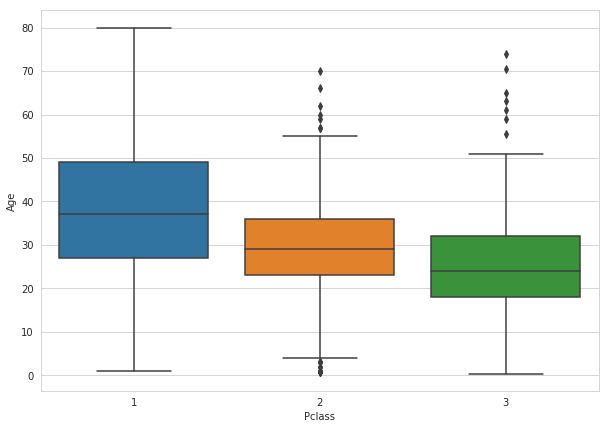

In [13]:
# Age distribution by "wealth"
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass', y='Age', data=train)

- We can see that wealthier passengers has a higher age average
- With this information we could fill the age gaps smarter thant just filling with the average age of all passengers

In [14]:
# filling the age gaps
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

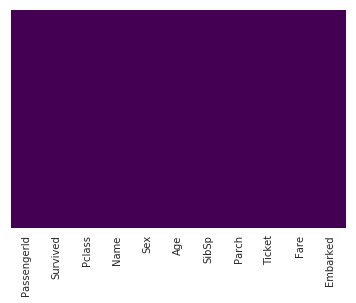

In [15]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Seens that there is no more null values

In [16]:
# dropping null values just for security
train.dropna(inplace=True)

### 2) Dealing with categorical features

In [17]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [18]:
# Encoding sex variable
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [19]:
# Encoding embark variable
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [20]:
# Encoding Pclass variable
pclass = pd.get_dummies(train['Pclass'], drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [21]:
train = pd.concat([train, sex, embark, pclass], axis=1)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0


In [22]:
# Dropping useless columns
train.drop(['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket', 'Pclass'], axis=1, inplace=True)
train.head(2)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0


In [23]:
# Running all the transformations on the test data too
kaggle_submission['Age'] = kaggle_submission[['Age', 'Pclass']].apply(impute_age, axis=1)
kaggle_submission.dropna(inplace=True)
sex = pd.get_dummies(kaggle_submission['Sex'], drop_first=True)
embark = pd.get_dummies(kaggle_submission['Embarked'], drop_first=True)
pclass = pd.get_dummies(kaggle_submission['Pclass'], drop_first=True)
kaggle_submission = pd.concat([kaggle_submission, sex, embark, pclass], axis=1)
kaggle_submission.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Pclass', 'Cabin'], axis=1, inplace=True)
kaggle_submission

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3
12,904,23.0,1,0,82.2667,0,0,1,0,0
14,906,47.0,1,0,61.1750,0,0,1,0,0
24,916,48.0,1,3,262.3750,0,0,0,0,0
26,918,22.0,0,1,61.9792,0,0,0,0,0
28,920,41.0,0,0,30.5000,1,0,1,0,0
34,926,30.0,1,0,57.7500,1,0,0,0,0
41,933,37.0,0,0,26.5500,1,0,1,0,0
44,936,45.0,1,0,52.5542,0,0,1,0,0
46,938,45.0,0,0,29.7000,1,0,0,0,0
48,940,60.0,0,0,76.2917,0,0,0,0,0


## Trainning
- For testing the model, I will treat the train df (from train.csv) as it was all of my data, since the kaggle sumission df (from test.csv) doesnt have the Survived column. 

In [24]:
# Splitting in feature vectors and prediction vector
X = train.drop('Survived', axis=1)
y = train['Survived']

In [25]:
# Split in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
# fitting the model and getting predictions
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

/home/rafael/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
# Print model acuracy
print(classification_report(y_test, predictions))
print('\n\n')
# print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       163
           1       0.84      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267






### Predict for the kaggle submission df (just for test)

In [28]:
X_kaggle = kaggle_submission.drop('PassengerId', axis=1)
predictions = pd.DataFrame(logmodel.predict(X_kaggle))

In [29]:
predictions

,0
0,1
1,1
2,1
3,1
4,0
5,0
6,0
7,1
8,0
9,1
